__Satellite imagery - template matching__

We are working here with *000singapour_bis.png*, which is a copy of *000singapour.png*, which itself is an exctract of *T48NUG_20230425T031519_B02_10m.jp2*, a Sentinel 2 image of Singapore. We are using *000singapour_bis_template.png* as our template, which is a close up view from one of the simps on *000singapour_bis.png*.

Our goal is to isolate as many ships as possible on a piece of satellite imagery using the *match_template* function from skimage, and to obtain their number and location.

1) Importation of useful modules

In [1]:
import pathlib
import time
import numpy as np
import imageio
import matplotlib.pyplot as plt
from skimage import data
from skimage.feature import match_template

2) Definition of useful elements 

/tmp/ipykernel_84931/843563200.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img1 = imageio.imread('../data/images/000singapour_bis.PNG')
/tmp/ipykernel_84931/843563200.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img1_template = imageio.imread('../data/images/000singapour_bis_template.png')


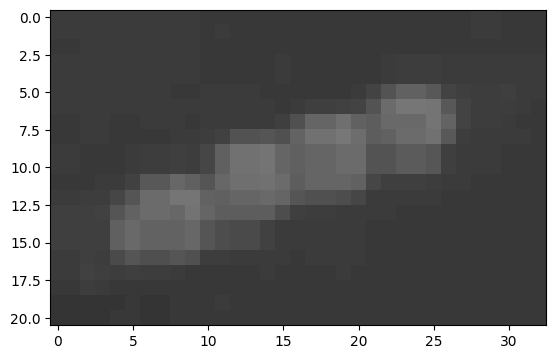

In [6]:
img1 = imageio.imread('../data/images/000singapour_bis.PNG')
img1_template = imageio.imread('../data/images/000singapour_bis_template.png')
#Adapt the path if the work directory changes
plt.imshow(img1)
plt.imshow(img1_template)
plt.show()

def MoyenneAdj(L,i,j):
    return (L[i,j-1]+L[i,j+1]+L[i-1,j]+L[i+1,j])/4

class Bateau:
    def __init__(self,coordonnées,contours):
        self.coord = coordonnées
        self.ctrs = contours

3. Template-matching with the match_template function from skimage

0.0
1.0


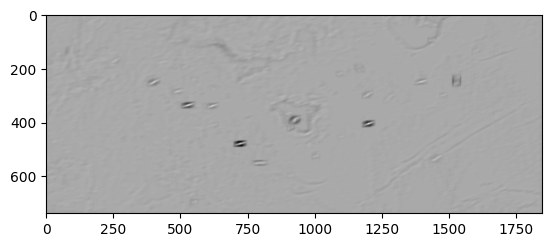

Heatmap creation time = 5.0544116497039795


In [7]:
start = time.time()          
result1 = match_template(img1, img1_template)
min = np.min(result1)
#On met l'image sur une gamme de valeurs [0,1]
for i in range(len(result1)):
    for j in range(len(result1[0])):
        result1[i][j] = result1[i][j]-min
max = np.max(result1)
for i in range(len(result1)):
    for j in range(len(result1[0])):       
        result1[i][j] = result1[i][j]/max
print(np.min(result1))
print(np.max(result1))
plt.imshow(result1, cmap='gray')
plt.show()
end = time.time()
print("Heatmap creation time =", end-start)

4. Binarization of the image to isolate areas of interest

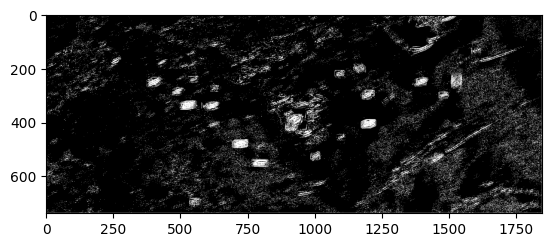

Binarization time = 7.138005256652832


In [8]:
start = time.time()
result1bis = result1.copy()
for i in range(1,len(result1)-1):
    for j in range(1,len(result1[0])-1):
        m = MoyenneAdj(result1,i,j)
        d = abs(result1[i][j] - MoyenneAdj(result1,i,j))
        if d > 0.00090 :
            result1bis[i][j] = 1
        else :
            result1bis[i][j] = 0
plt.imshow(result1bis, cmap='gray')
plt.show()
end = time.time()
print("Binarization time =", end-start)

5. Isolation of the ships from the noise by looking for rectangular "blocks" of white pixels, which we count and classify
**(/!\ VERY SLOW, unoptimized, counts duplicate pixels)**

In [ ]:
start = time.time()
ListeBateaux = []
PixelsEtudies = []
threshold = 1000
for i in range(len(result1)-50):
    for j in range(len(result1[0])-80):
        if result1bis[i][j] == 1 and [i,j] not in PixelsEtudies : 
            #On va créer un "Bateau" et ajouter tous les pixels blancs le constituant dans la liste prévue à cet effet
            compteur = 0
            ListePoints = [] #liste des points constituant le bateau
            for k in range(50):
                for p in range(80):
                    if result1bis[i+k][j+p] == 1 and [i+k,j+p] not in PixelsEtudies :
                        ListePoints.append([i+k,j+p])
                        compteur += 1
            if compteur > threshold :
                ListeBateaux.append(Bateau([i,j],ListePoints.copy()))
                PixelsEtudies = PixelsEtudies + ListePoints
end = time.time()
print("t1 =", end-start)

6) Visualization on a copy of the original image

In [ ]:
start = time.time()
img1bis = img1.copy()
for bat in ListeBateaux :
    print(bat.coord)
    for x in bat.ctrs :
        img1bis[x[0]][x[1]] = (255,0,0,255)
plt.imshow(img1bis)
plt.show()
end = time.time()
print("t2 =", end-start)
